In [1]:
import os
os.chdir("/Users/ieo5776/Desktop/signal_processing_course/")
import numpy as np
import matplotlib.pyplot as plt
from tools import denoise
import copy
import scipy.io

# Denoising data

Here i'll try to denoised the target data channel that's been provided.  
I have coded all major methods of **denoising** learned in this chapter and stored them in `tools`.

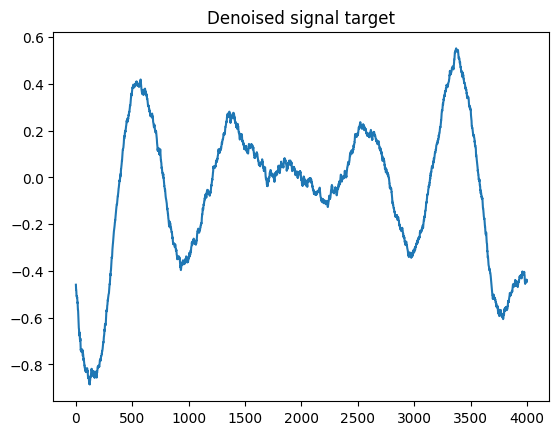

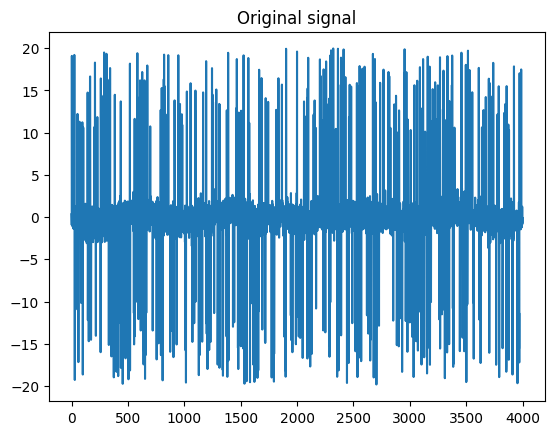

In [2]:
# Load signal
mat = scipy.io.loadmat("SignalProcessing/TimeSeriesDenoising/denoising_codeChallenge.mat")

#%matplotlib widget
# Show how the processed singal should look like
plt.plot(range(len(mat['cleanedSignal'][0])), mat['cleanedSignal'][0])
plt.title('Denoised signal target')
plt.show()
# Show the current raw signal
plt.plot(range(len(mat['origSignal'][0])), mat['origSignal'][0])
plt.title("Original signal")
plt.show()

## First considerations
1) Matlab file doesn't contain an artifact channel/array, therefore `least-square template matching` as a denoiser doesn't really make sense.
2) The frequency at which spikes happen doesn't really seem to be contanst, either it needs to be estimated from the data with some EDA or `time synch averaging` is not appropriate.
3) I cannot really see some obvious trends, either linear or not. Therefore, i don't think this approach should work.
4) Looking at the pattern of spikes, i think the best approach would be to go with a `median_filter` or a `gaussian smoothing`. `mean smoothing` could also work but it looks too smooth to be that. 

## Solutions

After various testing, here the best solution i have found

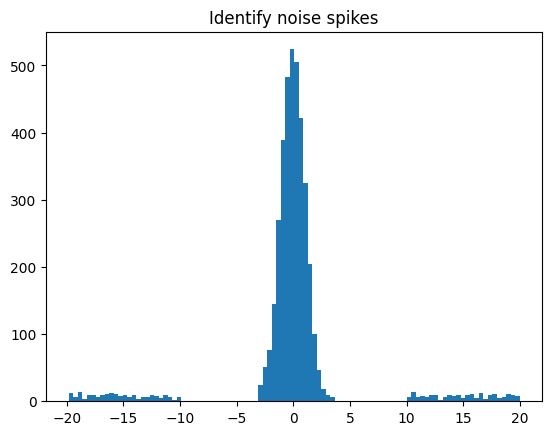

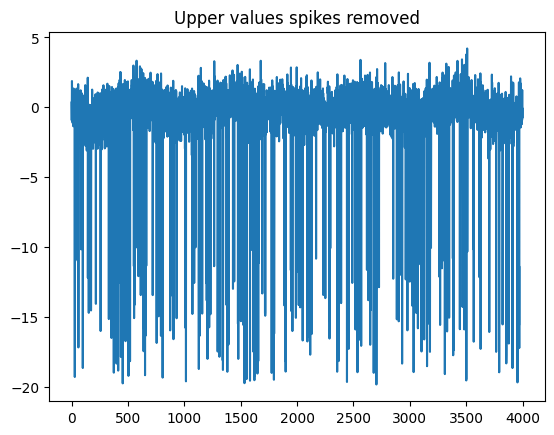

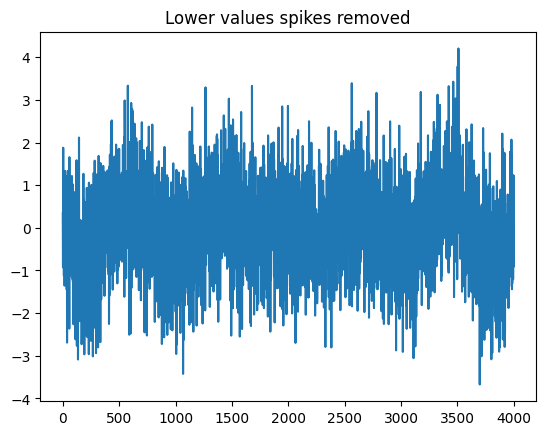

In [3]:
# median filter to remove spike noise
plt.hist(mat['origSignal'][0], 100)
plt.title('Identify noise spikes')
plt.show()

# Seems like the spikes are either > 5 or < -5.
# I'll try to apply the same smoothing twice for both thresholds
median_filt = denoise.median_filter(threshold=5, signal=mat['origSignal'][0],
                                      k=20)

plt.plot(range(len(mat['origSignal'][0])), median_filt)
plt.title('Upper values spikes removed')
plt.show()

median_filt_2 = denoise.median_filter(threshold=-5, signal=median_filt,
                                      k=20, direction="negative")

plt.plot(range(len(median_filt_2)), median_filt_2)
plt.title('Lower values spikes removed')
plt.show()

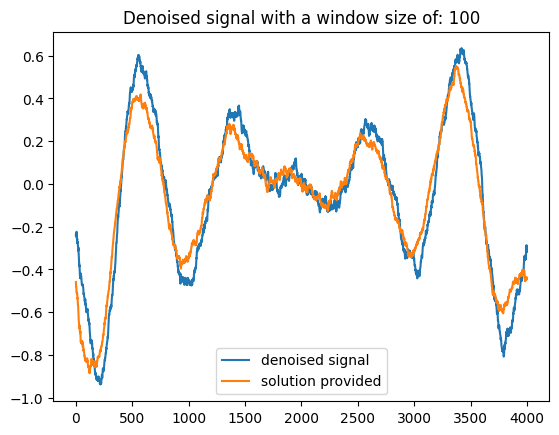

In [4]:
# Mean smoothing the spiked cleaned signal
k=100
median_mean_smoothed = denoise.mean_smoothing(k=k, 
                                         time=len(mat['origSignal'][0]), 
                                         signal=median_filt_2)

plt.plot(range(len(mat['origSignal'][0])), median_mean_smoothed, label="denoised signal")
plt.plot(range(len(mat['cleanedSignal'][0])), mat['cleanedSignal'][0], label="solution provided")
plt.title(f'Denoised signal with a window size of: {k}')
plt.legend()
plt.show()